# Подготовка модели распознавания рукописных букв и цифр

Вам предстоит самостоятельно обучить модель для задачи распознавания рукописных букв и цифр с помощью датасета `emnist`. Результатом должна быть обученная модель, сохранённая в файл `model.pkl`.

Можете воспользоваться предложенным порядком действий и подсказками из этого ноутбука или подойти к решению задачи самостоятельно и написать всё с нуля. То же касается и процесса упаковки модели в сервис для распознавания самостоятельно написанных символов.

В этом ноутбуке комментариями и символами `...` отмечены места для вашего кода.

Перед отправкой решения убедитесь, что все ячейки ноутбука выполняются последовательно без ошибок, если запустить `Kernel -> Restart & Run All`.

Успехов!

### 1. Установите и импортируйте необходимые библиотеки

In [1]:
import os
import pickle
import emnist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
# your imports here

### 2. Загрузите датасет и проанализируйте его

Датасет в качестве лейблов (или таргетов) содержит числа от 0 до 46. Каждому числу соответствует ASCII-код некоторого символа. Пары «лейбл — код» хранятся в файле `emnist-balanced-mapping.txt`.
Выведите на экран количество семплов в каждом сплите датасета и размер изображений. Также для каждого лейбла выведите соответствующий ему символ и количество тренировочных семплов, приходящееся на него.
Посмотрите на несколько примеров изображений.

_Подсказка: чтобы получить символ из ASCII-кода, нужно воспользоваться функцией_ `chr()`. _Для вашего удобства можно построить словарь_ (`dict`) _соответствий._

In [2]:
images_train, labels_train = emnist.extract_training_samples('balanced')
images_test, labels_test = emnist.extract_test_samples('balanced')
print(f'Train: {images_train.shape[0]} samples')
print(f'Test: {images_test.shape[0]} samples')
print(f'Image size: {images_test.shape[1:]}')

Train: 112800 samples
Test: 18800 samples
Image size: (28, 28)


In [3]:
labels_dict = {
    0: 48,
    1: 49,
    2: 50,
    3: 51,
    4: 52,
    5: 53,
    6: 54,
    7: 55,
    8: 56,
    9: 57,
    10: 65,
    11: 66,
    12: 67,
    13: 68,
    14: 69,
    15: 70,
    16: 71,
    17: 72,
    18: 73,
    19: 74,
    20: 75,
    21: 76,
    22: 77,
    23: 78,
    24: 79,
    25: 80,
    26: 81,
    27: 82,
    28: 83,
    29: 84,
    30: 85,
    31: 86,
    32: 87,
    33: 88,
    34: 89,
    35: 90,
    36: 97,
    37: 98,
    38: 100,
    39: 101,
    40: 102,
    41: 103,
    42: 104,
    43: 110,
    44: 113,
    45: 114,
    46: 116
}

In [4]:
labels_dict = {k: chr(v) for k, v in labels_dict.items()}
labels_dict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [9]:
# Количество вхождений каждого символа в тренировочном датасете.
{symbol: np.count_nonzero(labels_train==label) for label, symbol in labels_dict.items()}

{'0': 2400,
 '1': 2400,
 '2': 2400,
 '3': 2400,
 '4': 2400,
 '5': 2400,
 '6': 2400,
 '7': 2400,
 '8': 2400,
 '9': 2400,
 'A': 2400,
 'B': 2400,
 'C': 2400,
 'D': 2400,
 'E': 2400,
 'F': 2400,
 'G': 2400,
 'H': 2400,
 'I': 2400,
 'J': 2400,
 'K': 2400,
 'L': 2400,
 'M': 2400,
 'N': 2400,
 'O': 2400,
 'P': 2400,
 'Q': 2400,
 'R': 2400,
 'S': 2400,
 'T': 2400,
 'U': 2400,
 'V': 2400,
 'W': 2400,
 'X': 2400,
 'Y': 2400,
 'Z': 2400,
 'a': 2400,
 'b': 2400,
 'd': 2400,
 'e': 2400,
 'f': 2400,
 'g': 2400,
 'h': 2400,
 'n': 2400,
 'q': 2400,
 'r': 2400,
 't': 2400}

In [5]:
labels_train

array([45, 36, 43, ..., 23, 31,  8], dtype=uint8)

Label: n


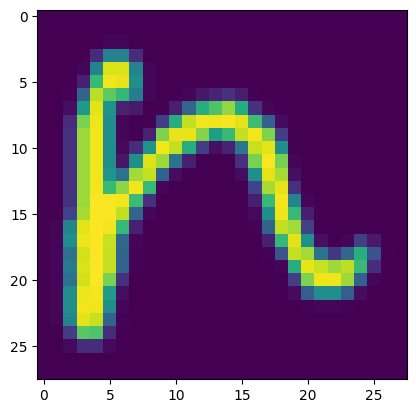

In [6]:
# your code here
idx = 2
print(f'Label: {labels_dict[labels_train[idx]]}')
plt.imshow(images_train[idx])

### 3. Подготовьте датасет для обучения и валидации

_Подсказка: чтобы вытянуть изображения в вектор, понадобится метод_ `reshape` _из библиотеки_ `numpy`.

In [108]:
# X_train = ...
# y_train = ...
# X_test = ...
# y_test = ...

# print('Train:', X_train.shape)
# print('Test:', X_test.shape)

In [14]:
img_rows = 28
img_cols = 28

input_shape = (img_rows, img_cols, 1)

X_train = images_train.reshape(images_train.shape[0], img_rows, img_cols, 1)
X_test = images_test.reshape(images_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Нормализация
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(labels_train, 47)
Y_test = np_utils.to_categorical(labels_test, 47)

In [15]:
# Разделение тренировочного датасета на тренировочную и валидационную выборки
train_x, val_x, train_y, val_y = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

print(f'Train: {train_x.shape[0]} samples')
print(f'Validation: {val_x.shape[0]} samples')
print(f'Image size: {train_x.shape[1:]}')

Train: 90240 samples
Validation: 22560 samples
Image size: (28, 28, 1)


### 4. Выберите модель, обучите её, протестируйте и сохраните

Выведите на экран точность вашей модели. Выведите и проанализируйте матрицу ошибок. Какие два символа она чаще всего путает? На каком символе модель чаще всего ошибается?

In [75]:
# your code here
clf = Sequential()
clf.add(Conv2D(32, 3, 3, padding='same', input_shape=input_shape, activation='relu'))
clf.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
clf.add(Conv2D(64, 3, 3, padding='same', input_shape=input_shape, activation='relu'))
clf.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
clf.add(Flatten())
clf.add(Dense(1024, activation='relu'))
clf.add(Dropout(0.5))
clf.add(Dense(47, activation='softmax'))

In [77]:
batch_size = 64

clf.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = clf.fit(
    train_x,
    train_y,
    batch_size=batch_size,
    epochs=10,
    verbose = 1,
    validation_data=(val_x, val_y)
)

score = clf.evaluate(X_test, Y_test, verbose=0)
print(f'Test score: {score[0]}')
print(f'Test accuracy: {score[1]}')

Epoch 1/20
2820/2820 [==============================] - 15s 5ms/step - loss: 0.3751 - accuracy: 0.8615 - val_loss: 0.4800 - val_accuracy: 0.8405
Epoch 2/20
2820/2820 [==============================] - 14s 5ms/step - loss: 0.3761 - accuracy: 0.8605 - val_loss: 0.4813 - val_accuracy: 0.8375
Epoch 3/20
2820/2820 [==============================] - 13s 5ms/step - loss: 0.3703 - accuracy: 0.8613 - val_loss: 0.4778 - val_accuracy: 0.8452
Epoch 4/20
2820/2820 [==============================] - 14s 5ms/step - loss: 0.3642 - accuracy: 0.8653 - val_loss: 0.4746 - val_accuracy: 0.8480
Epoch 5/20
2820/2820 [==============================] - 13s 5ms/step - loss: 0.3614 - accuracy: 0.8648 - val_loss: 0.4860 - val_accuracy: 0.8440
Epoch 6/20
2820/2820 [==============================] - 14s 5ms/step - loss: 0.3577 - accuracy: 0.8660 - val_loss: 0.4785 - val_accuracy: 0.8418
Epoch 7/20
2820/2820 [==============================] - 13s 5ms/step - loss: 0.3510 - accuracy: 0.8694 - val_loss: 0.4952 - val_ac

<Figure size 640x480 with 0 Axes>

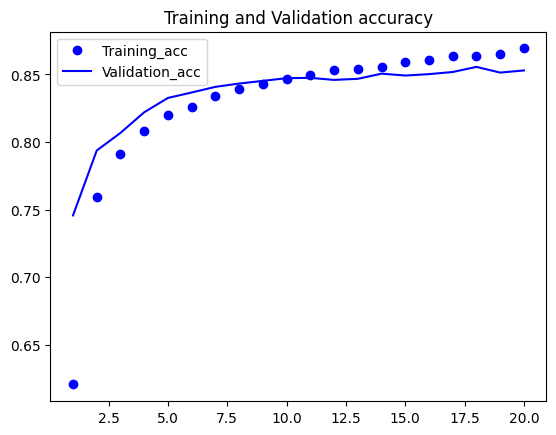

<Figure size 640x480 with 0 Axes>

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training_acc')
plt.plot(epochs, val_acc, 'b', label='Validation_acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

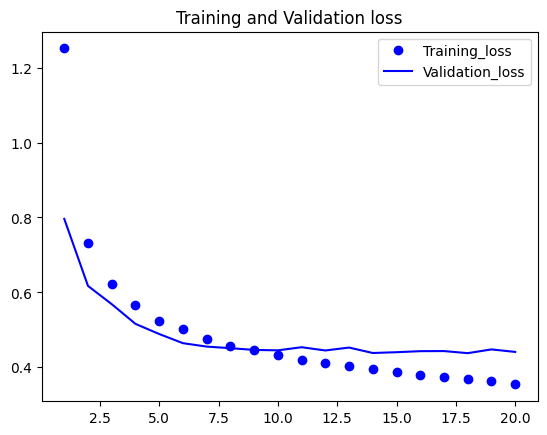

<Figure size 640x480 with 0 Axes>

In [70]:
plt.plot(epochs, loss, 'bo', label='Training_loss')
plt.plot(epochs, val_loss, 'b', label='Validation_loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()

In [78]:
preds = clf.predict(X_test)

588/588 [==============================] - 1s 2ms/step


In [88]:
predicted_labels = [np.argmax(x) for x in preds]

Text(0.5, 340.7222222222221, 'Predicted_classes')

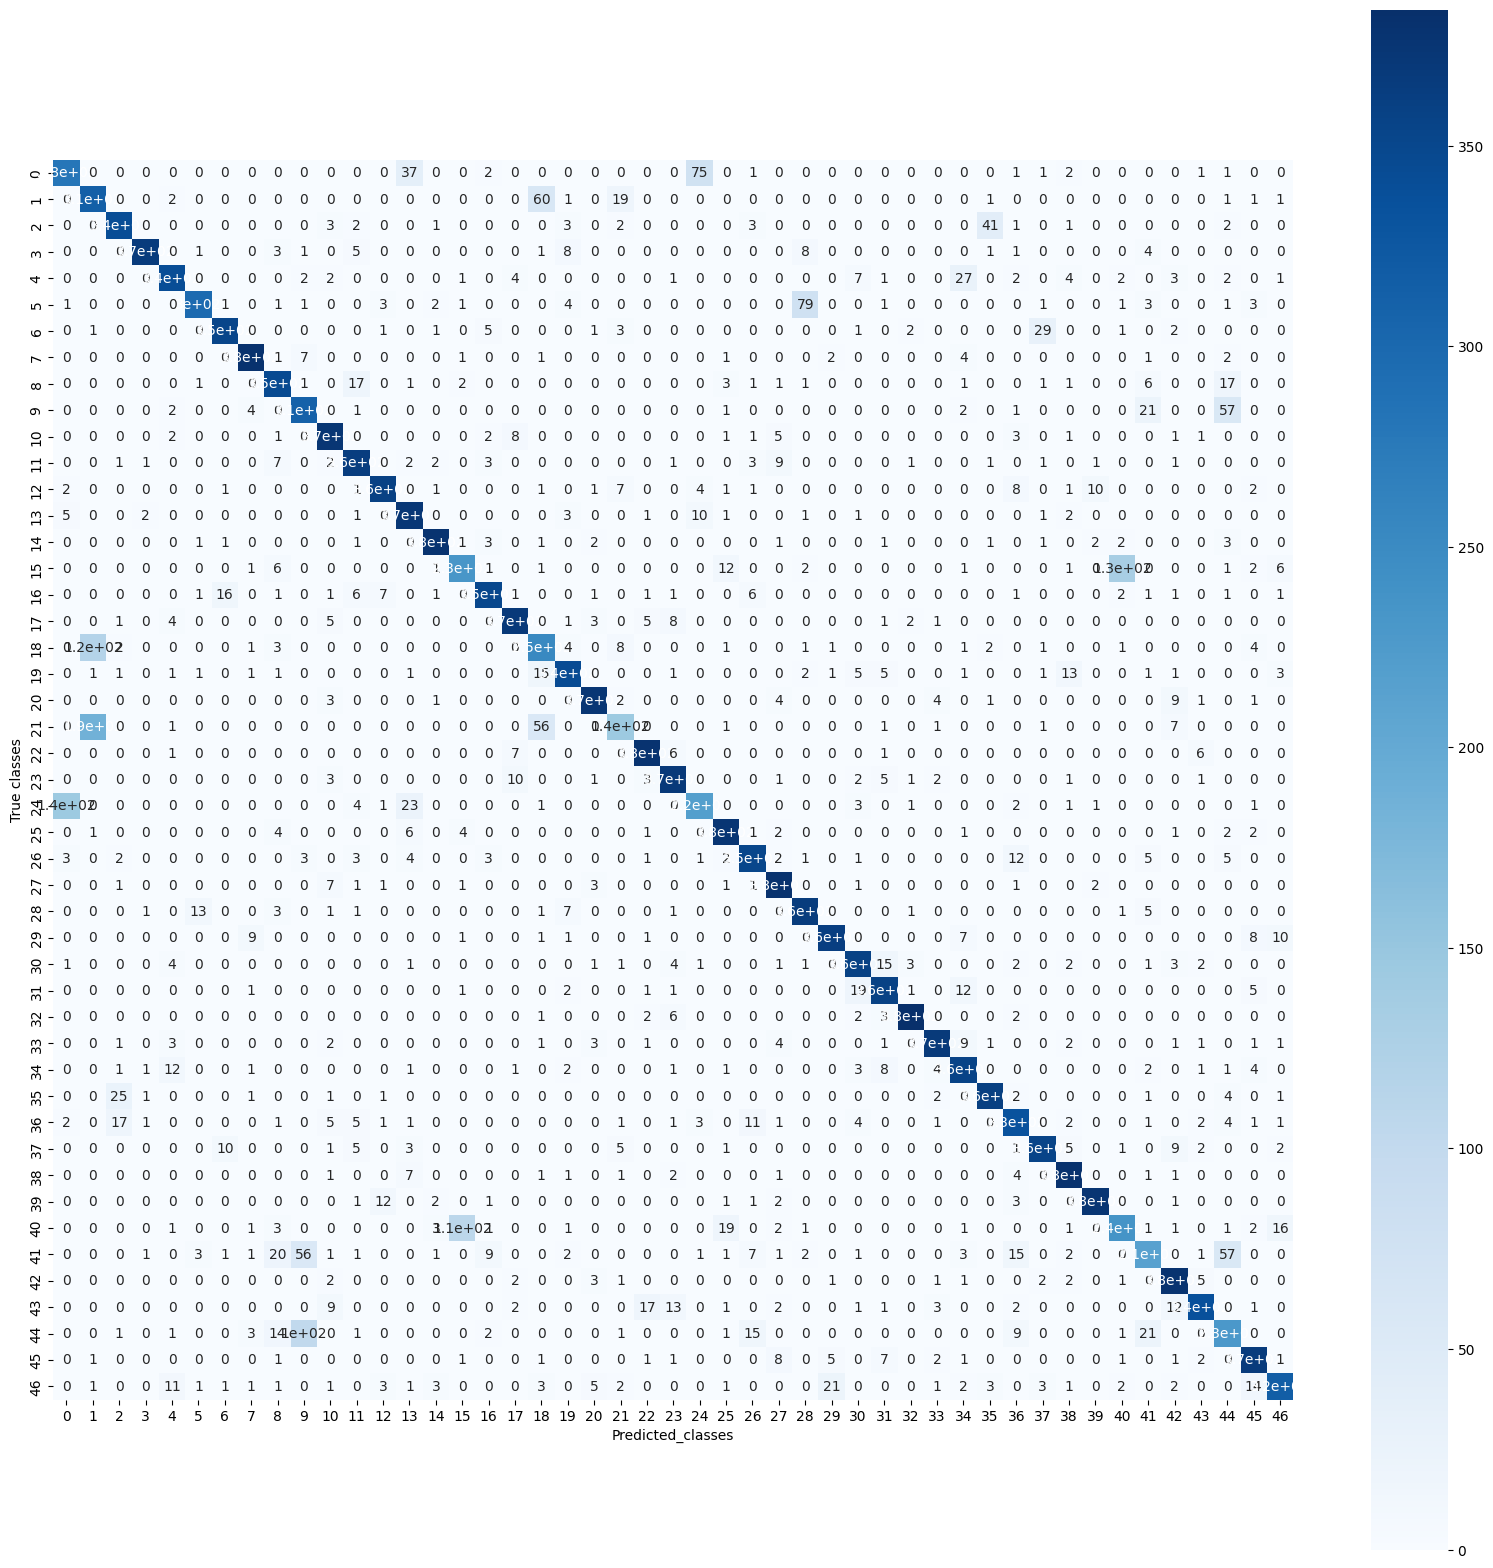

In [98]:
cm = confusion_matrix(labels_test, predicted_labels)

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, square=True, cmap='Blues')
plt.ylabel('True classes')
plt.xlabel('Predicted_classes')

In [ ]:
# Наиболее частые ошибки: L и I принимаются за 1, O за 0, q за 9, 5 за S. 
# Чаще всего путаются между собой f и F
# Частые ошибки объясняются взаимной схожестью некоторых символов на изображениях.

In [48]:
clf.save(os.path.join('myapp', 'model.h5'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2024-03-28 16:14:39         3260
metadata.json                                  2024-03-28 16:14:39         

## Проверка десериализации модели

In [30]:
from keras.models import load_model

model_keras = load_model('myapp/model.h5')

In [31]:
score2 = model_keras.evaluate(X_test, Y_test, verbose=0)
print(f'Test score: {score2[0]}')
print(f'Test accuracy: {score2[1]}')

Test score: 0.4788414239883423
Test accuracy: 0.8376063704490662


In [26]:
preds = model_keras.predict(X_test)

588/588 [==============================] - 1s 1ms/step


Предсказанный класс: e


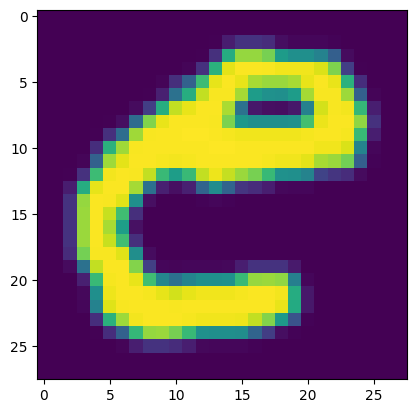

In [29]:
idx = 1
print(f'Предсказанный класс: {labels_dict[np.argmax(preds[idx])]}')
plt.imshow(X_test[idx])